<a href="https://colab.research.google.com/github/Dnyanada-Jalindre-18/Deep-Learning/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face Mask Detection using CNN**

## Importing Libraries and dataset

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import cv2
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D

## Importing Face Mask data

### Unzipping folder containing images

In [2]:
with zipfile.ZipFile('/content/drive/MyDrive/face mask data.zip') as file:
    file.extractall("")

In [3]:
train = os.listdir('/content/Face Mask Dataset/Train')
test  = os.listdir('/content/Face Mask Dataset/Test')

In [4]:
# Contents of train folder
print("Train data : ", train)

# Contents of test folder
print("Test data  : ", test)

Train data :  ['WithMask', 'WithoutMask']
Test data  :  ['WithMask', 'WithoutMask']


In [5]:
print(len(os.listdir('/content/Face Mask Dataset/Train/WithMask')))
print(len(os.listdir('/content/Face Mask Dataset/Train/WithoutMask')))

5000
5000


## Getting our Train and Test set ready

In [6]:
# Train set
x_train = []
y_train = []

for each in test:
    mask = os.listdir('/content/Face Mask Dataset/Train/' +each)
    for image in mask:
        #print(image)
        img = '/content/Face Mask Dataset/Train/' +each + "/" +image
        new_img = cv2.imread(img)
        new_img = cv2.resize(new_img,(30,30))
        x_train.append(new_img)
        y_train.append(each)

In [7]:
# Test set
x_test = []
y_test = []

for each in train:
    mask = os.listdir('/content/Face Mask Dataset/Test/' +each)
    for image in mask:
        #print(image)
        img = '/content/Face Mask Dataset/Test/' +each + "/" +image
        new_img = cv2.imread(img)
        new_img = cv2.resize(new_img,(30,30))
        x_test.append(new_img)
        y_test.append(each)

In [8]:
print("Length of x_train : ", len(x_train))
print("Length of y_train : ", len(y_train))

Length of x_train :  10000
Length of y_train :  10000


In [9]:
print("Length of X_test : ", len(x_test))
print("Length of y_test : ", len(y_test))

Length of X_test :  992
Length of y_test :  992


Now we've our train and test set with us.

## Converting list data into NumPy array

In [10]:
x_train = np.array(x_train)
x_test  = np.array(x_test)

In [11]:
print("Shape of X_train is : ", x_train.shape, " X_test : ", x_test.shape)

Shape of X_train is :  (10000, 30, 30, 3)  X_test :  (992, 30, 30, 3)


In [12]:
y_train = np.array(y_train)
y_test  = np.array(y_test)

## Let's visualize some images

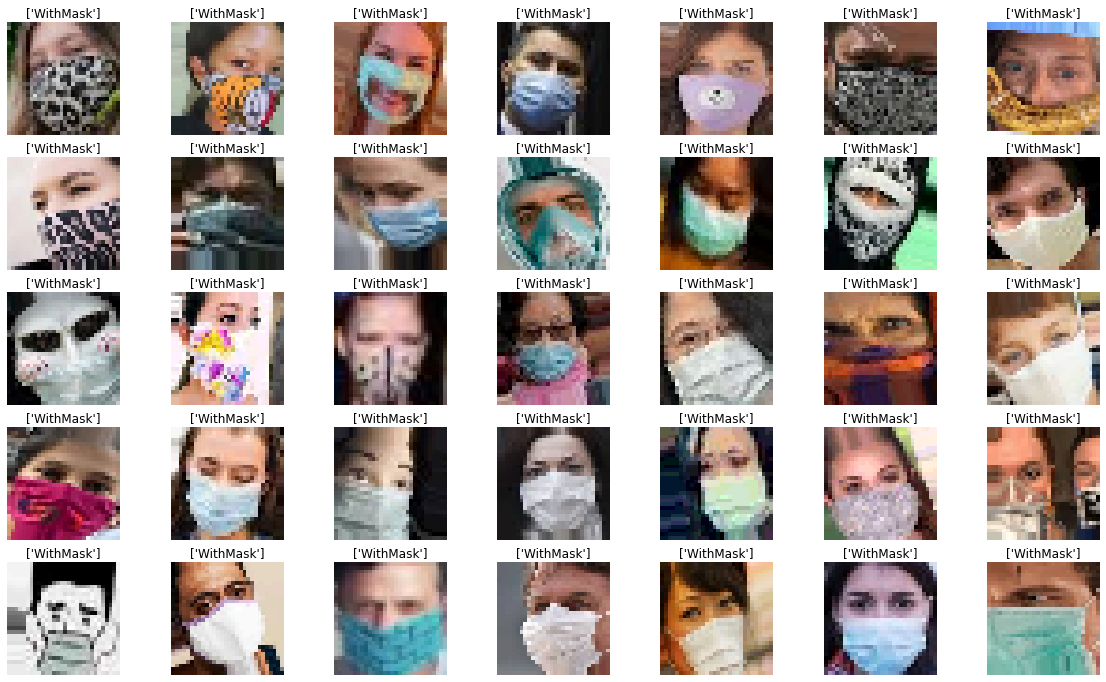

In [13]:
fig, axes = plt.subplots(5, 7, figsize=(20,12))
axes = axes.ravel()

for i in np.arange(0, 35):
    axes[i].imshow(cv2.cvtColor(x_train[i], cv2.COLOR_BGR2RGB))
    axes[i].axis('off')
    axes[i].set_title([y_train[i]])

## Data normalization

In [14]:
x_test[1]

array([[[  9,   4,  18],
        [  3,   3,  18],
        [ 62,  69,  92],
        ...,
        [ 30,  52,  93],
        [ 19,  44,  80],
        [ 19,  39,  72]],

       [[ 15,  10,  31],
        [ 23,  21,  50],
        [ 92, 107, 137],
        ...,
        [ 32,  56, 102],
        [ 24,  50,  90],
        [ 17,  39,  75]],

       [[ 20,  16,  44],
        [ 28,  28,  63],
        [105, 121, 154],
        ...,
        [ 38,  62, 108],
        [ 29,  53,  97],
        [ 22,  43,  82]],

       ...,

       [[119, 143, 172],
        [119, 144, 180],
        [104, 127, 166],
        ...,
        [ 86, 106, 147],
        [ 89, 111, 147],
        [ 53,  74, 107]],

       [[129, 145, 157],
        [133, 148, 166],
        [126, 143, 163],
        ...,
        [ 85, 104, 137],
        [ 74,  95, 123],
        [ 20,  39,  66]],

       [[179, 182, 163],
        [167, 165, 161],
        [151, 148, 144],
        ...,
        [112, 121, 130],
        [113, 125, 128],
        [127, 137, 149]]

In [15]:
# normalizing the data in the range of 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [16]:
x_test[1]

array([[[0.03529412, 0.01568627, 0.07058824],
        [0.01176471, 0.01176471, 0.07058824],
        [0.24313725, 0.27058824, 0.36078431],
        ...,
        [0.11764706, 0.20392157, 0.36470588],
        [0.0745098 , 0.17254902, 0.31372549],
        [0.0745098 , 0.15294118, 0.28235294]],

       [[0.05882353, 0.03921569, 0.12156863],
        [0.09019608, 0.08235294, 0.19607843],
        [0.36078431, 0.41960784, 0.5372549 ],
        ...,
        [0.1254902 , 0.21960784, 0.4       ],
        [0.09411765, 0.19607843, 0.35294118],
        [0.06666667, 0.15294118, 0.29411765]],

       [[0.07843137, 0.0627451 , 0.17254902],
        [0.10980392, 0.10980392, 0.24705882],
        [0.41176471, 0.4745098 , 0.60392157],
        ...,
        [0.14901961, 0.24313725, 0.42352941],
        [0.11372549, 0.20784314, 0.38039216],
        [0.08627451, 0.16862745, 0.32156863]],

       ...,

       [[0.46666667, 0.56078431, 0.6745098 ],
        [0.46666667, 0.56470588, 0.70588235],
        [0.40784314, 0

In [18]:
# Encoding categorical variable
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [19]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

## Applying CNN architecture

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(30,30,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(96,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))

Epoch 1/10
100/100 [==============================] - 1s 11ms/step - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.0167 - val_accuracy: 0.9929
Epoch 2/10
100/100 [==============================] - 1s 6ms/step - loss: 0.0191 - accuracy: 0.9926 - val_loss: 0.0402 - val_accuracy: 0.9879
Epoch 3/10
100/100 [==============================] - 1s 6ms/step - loss: 0.0124 - accuracy: 0.9954 - val_loss: 0.0419 - val_accuracy: 0.9879
Epoch 4/10
100/100 [==============================] - 1s 6ms/step - loss: 0.0208 - accuracy: 0.9938 - val_loss: 0.0419 - val_accuracy: 0.9808
Epoch 5/10
100/100 [==============================] - 1s 6ms/step - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.0254 - val_accuracy: 0.9879
Epoch 6/10
100/100 [==============================] - 1s 6ms/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.0197 - val_accuracy: 0.9940
Epoch 7/10
100/100 [==============================] - 1s 6ms/step - loss: 0.0205 - accuracy: 0.9930 - val_loss: 0.0202 - val_accuracy: 0.9909
Epoch

## Evaluating model

In [26]:
model.evaluate(x_test, y_test)

31/31 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 0.9940


[0.017705731093883514, 0.9939516186714172]

## Saving model

In [29]:
model.save('face_mask_final.h5')

## Confusion matrix

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


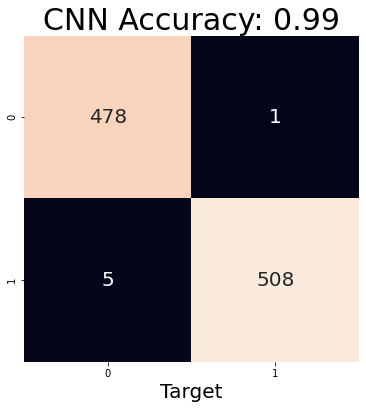

In [41]:
ypred = model.predict_classes(x_test)
plt.subplots(figsize=(6,6))

sns.heatmap(confusion_matrix(ypred,y_test),annot=True,fmt="1.0f",cbar=False,annot_kws={"size": 20})

plt.title(f"CNN Accuracy: {round(accuracy_score(ypred,y_test),2)}",fontsize=30)
plt.xlabel("Target",fontsize=20)
plt.show()

## Let's try to predict output for some images

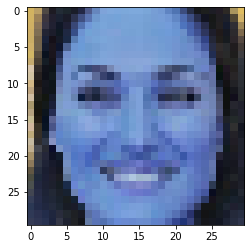

In [91]:
sample_mask_img = cv2.imread('/content/Face Mask Dataset/Validation/WithoutMask/1003.png',)
sample_mask_img = cv2.resize(sample_mask_img,(30,30))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,30,30,3])
sample_mask_img = sample_mask_img/255

In [92]:
model.predict_classes(sample_mask_img)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

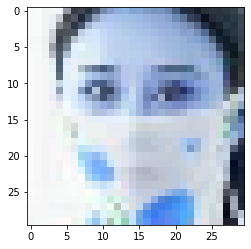

In [93]:
sample_mask_img = cv2.imread('/content/Face Mask Dataset/Validation/WithMask/1358.png')
sample_mask_img = cv2.resize(sample_mask_img,(30,30))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,30,30,3])
sample_mask_img = sample_mask_img/255

In [94]:
model.predict_classes(sample_mask_img)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]], dtype=int32)

## Visualizing model training history

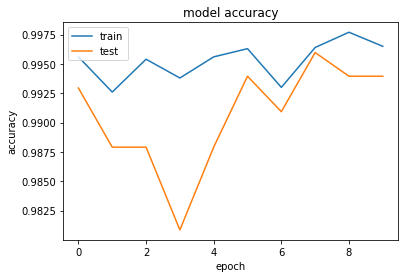

In [95]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

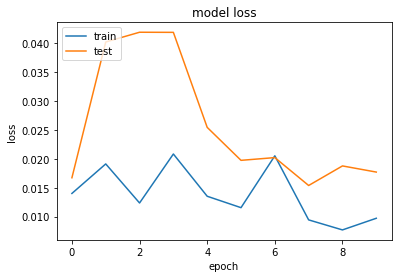

In [96]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()